#K-Means Clustering Python Demo

Create our sample dataset

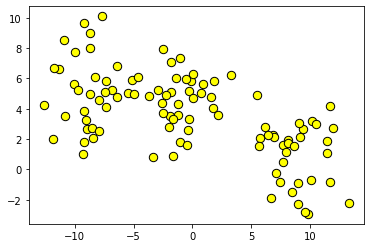

In [ ]:
# Let's make a dataset that we'll use to demo KNN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# We use make_blobs to create a 200 samples, of two classes with 3 centers
# Focus only on X that has the sample data
X, Y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=2, shuffle=True, random_state=7)

# plot our points
plt.scatter(X[:, 0], X[:, 1], c='yellow', marker='o', edgecolor='black', s=70)
plt.show()

Use Sklearn's KMeans Class

In [ ]:
from sklearn.cluster import KMeans

# We set k=3 for this first trial, which we run for 10 times (n_init) and run it for 500 iterations

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

# NOTE: We avoid convergence problems by choosing larger values for tol, 
# which is a parameter that controls the tolerance with regard to 
# the changes in the within-cluster sum-squared-error to declare convergence. 
# In the preceding code, we chose a tolerance of 1e-04 (= 0.0001)

In [ ]:
#The numbers correspond to the cluster they should go to
y_km

array([2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0], dtype=int32)

Create Visualizations for each Cluster

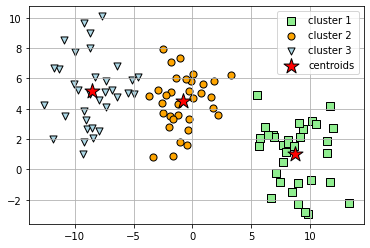

In [ ]:
# plot the 3 clusters
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

# Apply the Elbow Method using sum squared Distances

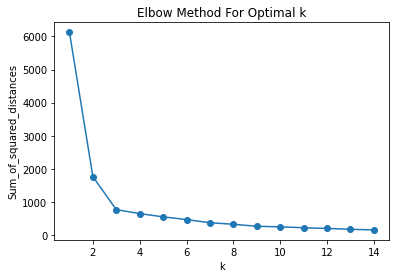

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = km.fit(X)
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Exercise 

In [ ]:
# 1)Create sample data with 4 different clusters
# 2) Use kmeans to predict those 4 clusters
# 3) plot the data
# 4) Apply the Elbow Method